# Sentiment Analysis (Naive Bayes)

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download vigneshwarsofficial/reviews

  0% 0.00/24.1k [00:00<?, ?B/s]
100% 24.1k/24.1k [00:00<00:00, 40.1MB/s]


In [3]:
!unzip reviews.zip

Archive:  reviews.zip
  inflating: Restaurant_Reviews.tsv  


In [4]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,  MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [6]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
reviews = df['Review'].to_list()

In [8]:
reviews = [re.sub('[^a-zA-Z]', ' ', x) for x in reviews]
reviews = [x.lower() for x in reviews]
reviews = [x.split() for x in reviews]

In [9]:
stopwords = stopwords.words('english')
stopwords = [x.lower() for x in stopwords]

In [10]:
prep_reviews = []

In [11]:
for review in reviews:
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords)]
    review = ' '.join(review)
    prep_reviews.append(review)

In [12]:
cv = CountVectorizer()
X = cv.fit_transform(prep_reviews).toarray()
y = df.iloc[:, 1].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [14]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

GaussianNB()

In [15]:
y_pred = gnb_clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.73      0.58      0.65       100
           1       0.65      0.79      0.71       100

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.68       200
weighted avg       0.69      0.69      0.68       200



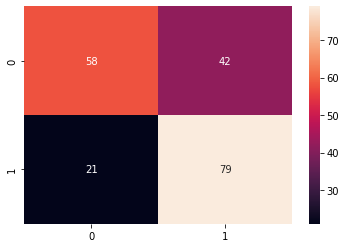

In [16]:
print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf, annot=True)

In [17]:
mnb_clf = MultinomialNB()
mnb_clf.fit(X_train, y_train)

MultinomialNB()

In [18]:
y_pred = mnb_clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       100
           1       0.74      0.80      0.77       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



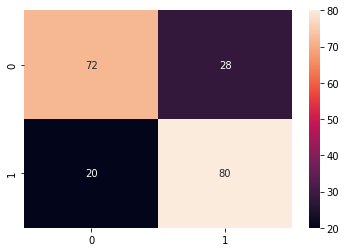

In [19]:
print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf, annot=True)

<hr>